# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:

# <Student to fill this section>

from brayam_pineda_ml import DataLoader, ModelTrainer, ModelEvaluator, Predictor, parse_height_to_cm

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Brayam Alexander Pineda"
student_id = "25587799"
group_id = "26"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to develop a machine learning model that accurately predicts the likelihood of a college basketball player being drafted into the NBA. By analyzing player performance statistics from the current season, the model will produce probability scores that reflect how likely each athlete is to be selected by a team.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can lead to better drafting strategies, more efficient use of scouting resources, and increased competitive advantage for NBA teams. On the other hand, inaccurate results may cause teams to overlook high-potential players or waste draft picks on less qualified candidates. Therefore, the model’s reliability is critical, not just for performance, but for fairness, reputation, and long-term trust in AI-driven sports analytics.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The primary users of the model predictions will be NBA team decision-makers, including scouts and general managers, who can integrate these insights into their draft strategies. Additionally, college programs, player agents, and sports analysts may use the results to track potential draftees and support players’ development and exposure. The predictions may impact athletes directly by influencing perceptions of their draftability, as well as teams by affecting draft choices, competitive outcomes, and financial investments."""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Experiment Description

In [14]:
experiment_description = """
Based on Experiment 1, where we trained the model using all variables with fixed hyperparameters, the goal of this experiment is to fine-tune the hyperparameters in order to achieve better performance than in Experiment 1. Although the results obtained previously were satisfactory (train AUC: 0.984, validation AUC: 0.993), we aim to further improve the model through fine-tuning."""

In [15]:
# Do not modify this code
print_tile(size="h3", key='experiment_description', value=experiment_description)

---
## D. Load Dataset

In [16]:
data_loader = DataLoader()
X_train = pd.read_csv("../Data/processed/X_train.csv")
X_val = pd.read_csv("../Data/processed/X_val.csv") 
X_test = pd.read_csv("../Data/processed/X_test.csv")
y_train = pd.read_csv("../Data/processed/y_train.csv")
y_val = pd.read_csv("../Data/processed/y_val.csv")

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)

2025-08-28 23:11:44.069 | INFO     | brayam_pineda_ml.data_loader:__init__:86 - DataLoader initialized with data folder: ../data/raw


(9846, 46)
(2462, 46)
(1297, 46)
(9846, 1)
(2462, 1)


---
## E. Data Transformation

### G.2 Data Transformation "normalisation"

In [17]:
# Use your package's feature preparation
X_train, X_val, X_test = data_loader.prepare_features(X_train, X_val, X_test)

# Use your package's scaling functionality
trainer = ModelTrainer()
X_train_scaled, X_val_scaled, X_test_scaled = trainer.scale_features(X_train, X_val, X_test)

print(X_train.shape, X_val.shape, X_test.shape)

2025-08-28 23:11:44.112 | INFO     | brayam_pineda_ml.data_loader:prepare_features:187 - Prepared features - Train: (9846, 44), Val: (2462, 44), Test: (1297, 44)
2025-08-28 23:11:44.113 | INFO     | brayam_pineda_ml.model_trainer:__init__:41 - ModelTrainer initialized with random_state=42
2025-08-28 23:11:44.116 | INFO     | brayam_pineda_ml.model_trainer:scale_features:108 - Features scaled using StandardScaler


(9846, 44) (2462, 44) (1297, 44)


In [36]:
X_test_scaled[0]

array([-1.27238064, -1.00998088, -1.00450608, -0.61291206, -0.55745273,
       -0.74328778, -0.31931991,  0.12707421, -0.33598291,  0.79894839,
       -0.76590397, -0.82002928, -1.82843806, -0.79833571, -0.82528817,
       -1.868592  , -0.56961208, -0.62826426,  0.64328466, -0.17048771,
       -0.60261263, -0.88195882,  0.32847127, -0.78987753, -1.10421305,
        0.50217733,  0.38256024,  0.44769102, -0.97383265, -0.98392959,
       -0.71012124, -0.77506633, -0.42687282, -1.28913816, -0.88474532,
       -1.18844479, -1.02448394, -0.77642819, -0.60130192, -0.69699501,
       -0.58279124, -0.72018408, -0.61036749, -0.60155837])

In [18]:
# <Student to fill this section>
data_transformation_1_explanations = """
Standardizing the data using StandardScaler is important to ensure that all features contribute equally to the model, especially those that are sensitive to feature magnitudes, such as logistic regression or distance-based models. By transforming features to have zero mean and unit variance, we prevent variables with larger scales from disproportionately influencing the learning process. This improves model stability, speeds up convergence, and ensures that regularization techniques operate effectively across all features.
"""

In [19]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [20]:
# <Student to fill this section>

In [21]:
# <Student to fill this section>
performance_metrics_explanations = """
The chosen performance metric is AUROC (Area Under the Receiver Operating Characteristic Curve), which is particularly appropriate for this task due to the strong class imbalance in the dataset — with only around 0.8% of players being drafted. AUROC evaluates the model's ability to distinguish between the positive and negative classes across all possible thresholds, making it more informative than accuracy or F1-score in imbalanced scenarios. It reflects how well the model ranks drafted players higher than non-drafted ones, which aligns directly with the business objective of identifying high-potential players. Therefore, AUROC provides a robust and threshold-independent measure of model performance for this classification problem.
"""

In [22]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [23]:
import lightgbm as lgb

In [24]:
# <Student to fill this section>
algorithm_selection_explanations = """
LightGBM was selected as the first modeling approach due to its proven performance with structured tabular data, its robustness to feature scaling, and its native support for handling imbalanced datasets — a critical factor in this task. Its ability to capture non-linear interactions and provide probabilistic outputs aligns well with the project's classification objective and the use of AUROC as the evaluation metric.
"""

In [25]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [26]:
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze("columns")   # -> Series
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze("columns")       # -> Series
    

from brayam_pineda_ml.utils import ensure_numeric, calculate_scale_pos_weight

X_train_scaled = ensure_numeric(X_train_scaled)
X_val_scaled = ensure_numeric(X_val_scaled)

scale_pos_weight = calculate_scale_pos_weight(y_train)

# Define the parameter grid for fine-tuning
param_grid = {
    'learning_rate': [0.001, 0.005, 0.01],
    'num_leaves': [32, 64, 128],
    'max_depth': [4, 6, 8, -1],
    'min_data_in_leaf': [10, 20, 50],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [3, 5, 7]
}

# Create base parameters (keeping the ones not in grid search)
base_params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'scale_pos_weight': scale_pos_weight,
    'verbose': -1,
    'random_state': 42,
    'n_estimators': 500
}

# Create a small temporary param grid for quick testing
temp_param_grid = {
    'learning_rate': [0.01, 0.05],
    'num_leaves': [31, 64]
}

2025-08-28 23:11:44.150 | INFO     | brayam_pineda_ml.utils:calculate_scale_pos_weight:54 - Calculated scale_pos_weight: 125.23 (negative: 9768, positive: 78)


In [27]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
The hyperparameters used for the initial LightGBM model were selected to balance model complexity, training efficiency, and the unique characteristics of the dataset — particularly its severe class imbalance. The objective='binary' and metric='auc' were chosen to align with the binary classification task and the AUROC evaluation metric. To address the imbalance (~0.8% positive class), scale_pos_weight was calculated based on the ratio of negative to positive samples, giving more weight to the minority class during training.

The learning rate (learning_rate=0.05) was set conservatively to ensure stable learning, and num_leaves=31 was chosen as a moderate value to balance model expressiveness and overfitting risk. max_depth=-1 allows the model to determine optimal depth per tree without hard constraints, while min_data_in_leaf=20 adds a regularization effect to avoid overly specific splits.

To further improve generalization, feature_fraction=0.8 and bagging_fraction=0.8 were applied to randomly sample features and rows, respectively, at each iteration, with bagging_freq=5 to trigger bagging every few rounds. Finally, a fixed random_state=42 ensures reproducibility of results across runs.
"""

In [28]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [29]:
best_model, grid_search, top_10_summary = trainer.train_with_grid_search(
    X_train_scaled, X_val_scaled, y_train, y_val,
    param_grid, cv=5
)

print("Top 10 best hyperparameter sets and their validation results:")
display(top_10_summary)

2025-08-28 23:11:44.974 | INFO     | brayam_pineda_ml.utils:validate_data_shapes:117 - Data shape validation passed
2025-08-28 23:11:44.985 | INFO     | brayam_pineda_ml.model_trainer:scale_features:108 - Features scaled using StandardScaler
2025-08-28 23:11:44.986 | INFO     | brayam_pineda_ml.utils:calculate_scale_pos_weight:54 - Calculated scale_pos_weight: 125.23 (negative: 9768, positive: 78)
2025-08-28 23:11:44.986 | INFO     | brayam_pineda_ml.model_trainer:train_with_grid_search:159 - Starting grid search hyperparameter tuning...
2025-08-29 00:16:34.897 | INFO     | brayam_pineda_ml.model_trainer:train_with_grid_search:183 - Best parameters: {'bagging_freq': 3, 'feature_fraction': 1.0, 'learning_rate': 0.01, 'max_depth': -1, 'min_data_in_leaf': 50, 'num_leaves': 32}
2025-08-29 00:16:34.911 | INFO     | brayam_pineda_ml.model_trainer:train_with_grid_search:184 - Best cross-validation score: 0.9856
2025-08-29 00:16:34.940 | INFO     | brayam_pineda_ml.utils:log_model_info:143 - B

Top 10 best hyperparameter sets and their validation results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bagging_freq,param_feature_fraction,param_learning_rate,param_max_depth,param_min_data_in_leaf,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
969,6.098316,0.114783,0.016064,0.008416,7,1.0,0.01,-1,50,32,"{'bagging_freq': 7, 'feature_fraction': 1.0, '...",0.983527,0.990208,0.983043,0.986207,0.984831,0.985563,0.002570,1
645,5.819723,0.046785,0.034723,0.050079,5,1.0,0.01,-1,50,32,"{'bagging_freq': 5, 'feature_fraction': 1.0, '...",0.983527,0.990208,0.983043,0.986207,0.984831,0.985563,0.002570,1
321,6.302729,0.629169,0.012425,0.004395,3,1.0,0.01,-1,50,32,"{'bagging_freq': 3, 'feature_fraction': 1.0, '...",0.983527,0.990208,0.983043,0.986207,0.984831,0.985563,0.002570,1
745,5.946890,0.075388,0.012037,0.001298,7,0.6,0.01,8,50,64,"{'bagging_freq': 7, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
746,6.573960,0.789718,0.044557,0.044628,7,0.6,0.01,8,50,128,"{'bagging_freq': 7, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
97,5.435875,0.139570,0.011250,0.003634,3,0.6,0.01,8,50,64,"{'bagging_freq': 3, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
98,5.422071,0.126940,0.009136,0.000442,3,0.6,0.01,8,50,128,"{'bagging_freq': 3, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
422,5.702067,0.087576,0.011847,0.002028,5,0.6,0.01,8,50,128,"{'bagging_freq': 5, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
421,5.797953,0.154611,0.023636,0.013954,5,0.6,0.01,8,50,64,"{'bagging_freq': 5, 'feature_fraction': 0.6, '...",0.980617,0.989014,0.987001,0.985663,0.985375,0.985534,0.002774,4
744,5.731270,0.755770,0.010077,0.000313,7,0.6,0.01,8,50,32,"{'bagging_freq': 7, 'feature_fraction': 0.6, '...",0.980617,0.988843,0.986933,0.985791,0.985407,0.985518,0.002727,10


### J.4 Model Technical Performance

> Provide some explanations on model performance


In [30]:
val_predictions = best_model.predict_proba(X_val_scaled)[:, 1]
val_auc = roc_auc_score(y_val, val_predictions)
print(f"Validation AUC with best model: {val_auc:.4f}")

Validation AUC with best model: 0.9922


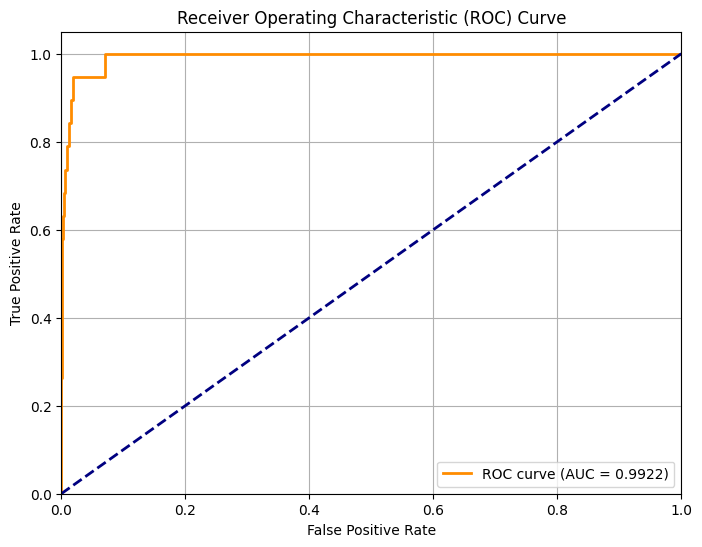

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_val_proba = best_model.predict_proba(X_val_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [38]:
# Export predictions for X_test dataset
# Get predicted probabilities for the positive class (drafted)
y_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Create submission DataFrame
submission_df = pd.DataFrame({
    'player_id': X_test.index,  # player_id is the index
    'drafted': y_test_proba
})

# Save to CSV file
submission_df.to_csv('../Data/processed/submission_2.csv', index=False)
# Save the trained model to the 'models' directory
joblib.dump(best_model, '../models/25587799_lightgbm_finetuned_model.joblib')
print(f"Probability range: {submission_df['drafted'].min():.4f} to {submission_df['drafted'].max():.4f}")

Probability range: 0.0003 to 0.9480


In [45]:
# <Student to fill this section>
model_performance_explanations = """
The model shows a very high AUROC (≈0.99), which initially suggests excellent discriminative performance. However, this result is misleading because of the strong class imbalance in the dataset, where drafted players represent only a very small fraction of the total. In practice, the model predicts almost exclusively the majority class (not drafted), failing to identify any drafted players. This explains why the AUROC appears strong—since predicting the majority class still achieves high accuracy in ranking—but the model has little real-world value for the intended task. The imbalance skews performance metrics, highlighting the need for alternative evaluation criteria (e.g., precision, recall, F1-score for the drafted class) and imbalance-handling strategies such as re-sampling, class weights, or tailored algorithms."""

In [46]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [47]:
# <Student to fill this section>
business_impacts_explanations = """
The experiments so far show that while the model achieves a very high AUROC, it fails to identify drafted players, predicting almost everyone as not drafted. This result directly conflicts with the business objective, which is to flag players with a meaningful probability of being drafted. The main business impact of such incorrect results is that promising athletes would be systematically overlooked, reducing the model’s utility for scouting or decision support. Misclassifying non-drafted players as drafted would also have consequences, but those are less severe than consistently missing the small group of true positives. Therefore, the most critical issue is the model’s inability to recognize the minority class, which undermines the value the business seeks from predictive analytics. To deliver actionable insights, the model must improve recall and precision for drafted players, even at the cost of a lower overall AUROC."""

In [48]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [49]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Rejected" # Either 'Hypothesis Confirmed', 'Hypothesis Partially Confirmed' or 'Hypothesis Rejected'

In [50]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [51]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment showed that while the model delivers a very high AUROC, it fails to meet the business objective because it predicts only the majority class and misses all drafted players. This outcome highlights that AUROC alone is not a sufficient metric under strong imbalance, and evaluation must shift toward class-specific metrics such as F1 and precision–recall. The results suggest the approach is not a dead end—there is clear separability in the data—but further experimentation is needed. Next steps include testing XGBoost with the current hyperparameters as a guide, adjusting for class imbalance through weights or resampling, removing problematic outliers, and adopting F1 alongside AUROC as evaluation criteria. These refinements are expected to improve the model’s ability to identify the minority drafted players, which is critical for the business goal.
"""

In [52]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)